In [5]:
!pip3 install datasets
!pip install evaluate
!pip install seqeval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=ba72b76df0c725b880b97182b27a6d3d9d50a073838a91f1417eff30b879594e
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
# import torch

In [7]:
df = pd.read_csv('/kaggle/input/ukr-news/output.csv')

In [8]:
df.columns

Index(['Id', 'title', 'title_words', 'title_word_offsets', 'title_word_labels',
       'text', 'text_words', 'text_word_offsets', 'text_word_labels',
       'source'],
      dtype='object')

In [9]:
df['text_words'][0]

'[[\'Напередодні\', \'річниці\', \'76-денно\', \'локдауну\', \'в\', \'Ухані\', \'-\', \'місті,\', \'де\', \'вперше\', \'був\', \'виявлений\', \'коронавірус\', \'—\', \'Китай\', \'випустив\', \'документальний\', \'фільм.\'], [\'У\', \'випущеному\', \'за\', \'підтримки\', \'держави\', \'документальному\', \'фільмі\', \'під\', \'назвою\', \'Days\', \'and\', \'Nights\', \'in\', \'Wuhan\', \'(Дні\', \'та\', \'ночі\', \'в\', \'Ухані)\', \'представлені\', \'матеріали\', \'30\', \'режисерів,\', \'що\', \'зображують\', \'страждання\', \'і\', \'жертви,\', \'принесені\', \'11\', \'мільйонами\', \'жителів\', \'міста,\', \'медичним\', \'персоналом\', \'та\', \'працівниками\', \'на\', \'передовій\', \'боротьби\', \'з\', \'вірусом,\', \'який\', \'почав\', \'поширюватися\', \'містом\', \'у\', \'грудні\', \'2019\', \'року,\', \'повідомляє\', \'AP.\'], [\'Фільм\', \'режисера\', \'Цао\', \'Цзіньліна\', \'є\', \'одним\', \'з\', \'трьох\', \'випущених\', \'документальних\', \'фільмів\', \'про\', \'карантин

In [10]:
df['text_word_labels'][0]

"[['O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG'], ['O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'B-LOC', 'B-LOC', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC'], ['O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC',

In [11]:
df['text_words'] = df['text_words'].apply(ast.literal_eval)
df['text_word_labels'] = df['text_word_labels'].apply(ast.literal_eval)

In [12]:
# df['text_words'][0]

In [13]:
unique_labels_cleaned = set(label for sublist in df['text_word_labels'].explode() for label in sublist)
unique_labels_cleaned

{'B-LOC', 'B-ORG', 'B-PER', 'I-LOC', 'I-ORG', 'I-PER', 'O'}

In [14]:
length_check_all = df.apply(lambda row: all(len(words) == len(labels) for words, labels in zip(row['text_words'], row['text_word_labels'])), axis=1)
length_check_all

0        True
1        True
2        True
3        True
4        True
         ... 
49528    True
49529    True
49530    True
49531    True
49532    True
Length: 49533, dtype: bool

In [15]:
false_count = length_check_all.value_counts().get(False, 0)
false_count

0

In [16]:
entities_count = {
    'LOC': sum(label in ['B-LOC', 'I-LOC'] for sublist in df['text_word_labels'].explode() for label in sublist),
    'ORG': sum(label in ['B-ORG', 'I-ORG'] for sublist in df['text_word_labels'].explode() for label in sublist),
    'PER': sum(label in ['B-PER', 'I-PER'] for sublist in df['text_word_labels'].explode() for label in sublist),
    'O': sum(label == 'O' for sublist in df['text_word_labels'].explode() for label in sublist)
}
entities_count

{'LOC': 401741, 'ORG': 604756, 'PER': 404455, 'O': 13649575}

In [17]:
total_labels = sum(entities_count.values())
percentages = {key: (value / total_labels) * 100 for key, value in entities_count.items()}

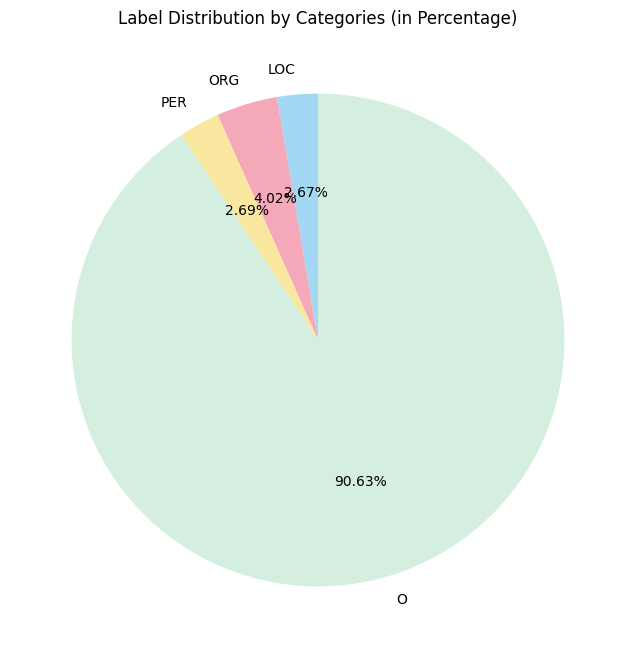

In [18]:
import matplotlib.pyplot as plt
soft_colors = ['#A3D8F4', '#F5A9B8', '#F9E79F', '#D4EFDF']

plt.figure(figsize=(8, 8))
plt.pie(percentages.values(), labels=percentages.keys(), autopct='%1.2f%%', startangle=90, colors=soft_colors)

plt.title('Label Distribution by Categories (in Percentage)')
plt.show()

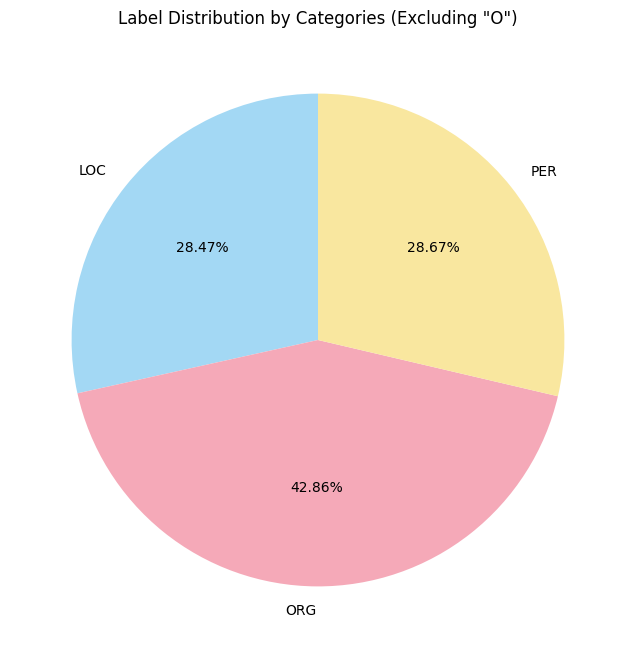

In [19]:
entities_count_without_O = {key: value for key, value in entities_count.items() if key != 'O'}

total_without_O = sum(entities_count_without_O.values())
percentages_without_O = {key: (value / total_without_O) * 100 for key, value in entities_count_without_O.items()}
soft_colors_without_O = ['#A3D8F4', '#F5A9B8', '#F9E79F']
plt.figure(figsize=(8, 8))
plt.pie(percentages_without_O.values(), labels=percentages_without_O.keys(), autopct='%1.2f%%', startangle=90, colors=soft_colors_without_O)

plt.title('Label Distribution by Categories (Excluding "O")')

plt.show()

## Видалення стоп слів

In [20]:
stop_words = set([
    "я", "ти", "він", "вона", "воно", "ми", "ви", "вони", "це", "не", "і", "в", "на", "з", "до", "по", "за", 
    "як", "але", "так", "що", "щоб", "якщо", "це", "також", "свої", "сказав", "може", "ще", "це", "для", "після", 
    "тому", "такі", "саме", "кожен", "хто", "всі", "ті", "якщо", "про", "коли", "навіть", "їх", "вже"
])

In [21]:
def remove_stopwords_and_labels_from_list_of_lists(text_words_list, text_word_labels_list):
    filtered_words_list = []
    filtered_labels_list = []
    
    for text_words, text_word_labels in zip(text_words_list, text_word_labels_list):
        filtered_words = []
        filtered_labels = []
        
        for word, label in zip(text_words, text_word_labels):
            if word.lower() not in stop_words: 
                filtered_words.append(word)
                filtered_labels.append(label)
        
        filtered_words_list.append(filtered_words)
        filtered_labels_list.append(filtered_labels)
    
    return filtered_words_list, filtered_labels_list

df['filtered_text_words'], df['filtered_text_word_labels'] = zip(*df.apply(
    lambda row: remove_stopwords_and_labels_from_list_of_lists(row['text_words'], row['text_word_labels']), axis=1))

df[['filtered_text_words', 'filtered_text_word_labels']].head()

,filtered_text_words,filtered_text_word_labels
0,"[[Напередодні, річниці, 76-денно, локдауну, Ух...","[[O, O, O, O, B-LOC, O, O, O, O, O, O, O, O, B..."
1,"[[Німеччина, та, Люксембург, знову, відкрили, ...","[[B-LOC, O, B-LOC, O, O, O, O, O, O, O, O, O, ..."
2,"[[Однокурсник, засновника, SoftServe, Юрія, Ва...","[[O, O, B-ORG, B-PER, I-PER, O, B-PER, I-PER, ..."
3,"[[Дослідники, Единбурзького, університету, вия...","[[O, B-ORG, I-ORG, O, O, O, O, O, O, O], [O, O..."
4,"[[перші, чотири, місяці, 2017, року, українськ...","[[O, O, O, O, O, O, O, O, O, O, O], [O, O, O, ..."


In [22]:
length_check_all = df.apply(lambda row: all(len(words) == len(labels) for words, labels in zip(row['filtered_text_words'], row['filtered_text_word_labels'])), axis=1)
length_check_all

0        True
1        True
2        True
3        True
4        True
         ... 
49528    True
49529    True
49530    True
49531    True
49532    True
Length: 49533, dtype: bool

In [23]:
false_count = length_check_all.value_counts().get(False, 0)
false_count

0

In [24]:
entities_count = {
    'LOC': sum(label in ['B-LOC', 'I-LOC'] for sublist in df['text_word_labels'].explode() for label in sublist),
    'ORG': sum(label in ['B-ORG', 'I-ORG'] for sublist in df['text_word_labels'].explode() for label in sublist),
    'PER': sum(label in ['B-PER', 'I-PER'] for sublist in df['text_word_labels'].explode() for label in sublist),
    'O': sum(label == 'O' for sublist in df['text_word_labels'].explode() for label in sublist)
}
entities_count

{'LOC': 401741, 'ORG': 604756, 'PER': 404455, 'O': 13649575}

In [25]:
entities_count_filtered = {
    'LOC': sum(label in ['B-LOC', 'I-LOC'] for sublist in df['filtered_text_word_labels'].explode() for label in sublist),
    'ORG': sum(label in ['B-ORG', 'I-ORG'] for sublist in df['filtered_text_word_labels'].explode() for label in sublist),
    'PER': sum(label in ['B-PER', 'I-PER'] for sublist in df['filtered_text_word_labels'].explode() for label in sublist),
    'O': sum(label == 'O' for sublist in df['filtered_text_word_labels'].explode() for label in sublist)
}
entities_count_filtered

{'LOC': 401238, 'ORG': 598019, 'PER': 404262, 'O': 11118253}

In [26]:
total_labels = sum(entities_count.values())
percentages_filtered = {key: (value / total_labels) * 100 for key, value in entities_count_filtered.items()}

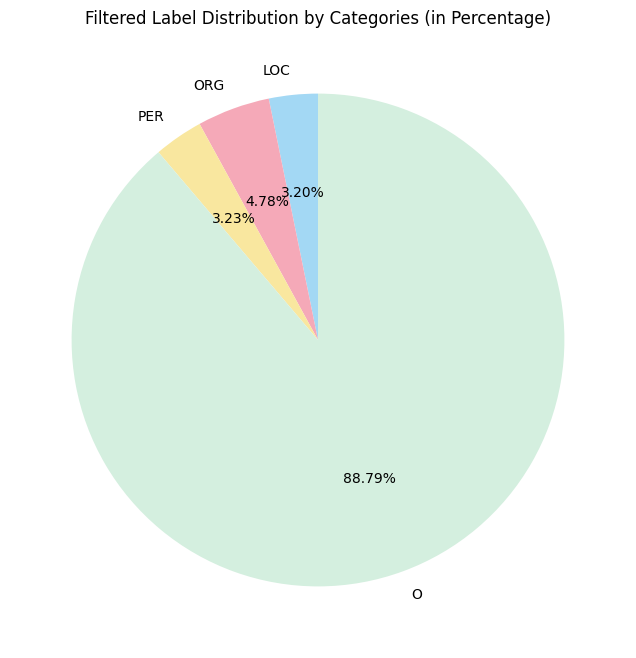

In [27]:
import matplotlib.pyplot as plt
soft_colors = ['#A3D8F4', '#F5A9B8', '#F9E79F', '#D4EFDF']


plt.figure(figsize=(8, 8))
plt.pie(percentages_filtered.values(), labels=percentages_filtered.keys(), autopct='%1.2f%%', startangle=90, colors=soft_colors)

plt.title('Filtered Label Distribution by Categories (in Percentage)')
plt.show()

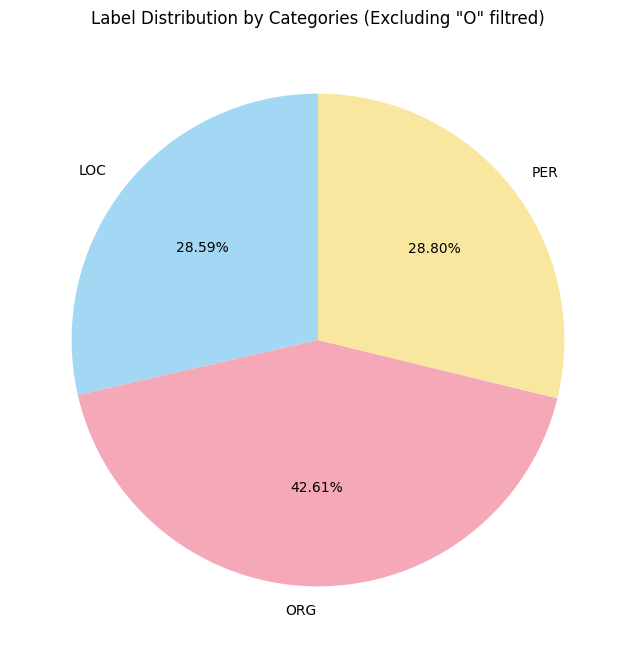

In [28]:
entities_count_without_O_flt = {key: value for key, value in entities_count_filtered.items() if key != 'O'}

total_without_O = sum(entities_count_without_O_flt.values())
percentages_without_O = {key: (value / total_without_O) * 100 for key, value in entities_count_without_O_flt.items()}
soft_colors_without_O = ['#A3D8F4', '#F5A9B8', '#F9E79F']
plt.figure(figsize=(8, 8))
plt.pie(percentages_without_O.values(), labels=percentages_without_O.keys(), autopct='%1.2f%%', startangle=90, colors=soft_colors_without_O)

plt.title('Label Distribution by Categories (Excluding "O" filtred)')

plt.show()

## Перетворення у єдиний список; train/validation/test

In [29]:
def flatten_list_of_lists(list_of_lists):
    flat_list = []
    for sublist in list_of_lists:
        flat_list.extend(sublist)
    return flat_list

df['flattened_filtered_text_words'] = df['filtered_text_words'].apply(flatten_list_of_lists)
df['flattened_filtered_text_word_labels'] = df['filtered_text_word_labels'].apply(flatten_list_of_lists)

df[['flattened_filtered_text_words', 'flattened_filtered_text_word_labels']].head()

,flattened_filtered_text_words,flattened_filtered_text_word_labels
0,"[Напередодні, річниці, 76-денно, локдауну, Уха...","[O, O, O, O, B-LOC, O, O, O, O, O, O, O, O, B-..."
1,"[Німеччина, та, Люксембург, знову, відкрили, с...","[B-LOC, O, B-LOC, O, O, O, O, O, O, O, O, O, O..."
2,"[Однокурсник, засновника, SoftServe, Юрія, Вас...","[O, O, B-ORG, B-PER, I-PER, O, B-PER, I-PER, O..."
3,"[Дослідники, Единбурзького, університету, вияв...","[O, B-ORG, I-ORG, O, O, O, O, O, O, O, O, O, O..."
4,"[перші, чотири, місяці, 2017, року, українсько...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [30]:
df[['flattened_filtered_text_words', 'flattened_filtered_text_word_labels']].to_csv('filtered_text.csv', index=False)

In [19]:
df_full = pd.read_csv('/kaggle/input/ukr-bigger/filtered_text.csv')

In [20]:
df_full['flattened_filtered_text_words'] = df_full['flattened_filtered_text_words'].apply(ast.literal_eval)
df_full['flattened_filtered_text_word_labels'] = df_full['flattened_filtered_text_word_labels'].apply(ast.literal_eval)

In [21]:
df_full.head(4)

,flattened_filtered_text_words,flattened_filtered_text_word_labels
0,"[Напередодні, річниці, 76-денно, локдауну, Уха...","[O, O, O, O, B-LOC, O, O, O, O, O, O, O, O, B-..."
1,"[Німеччина, та, Люксембург, знову, відкрили, с...","[B-LOC, O, B-LOC, O, O, O, O, O, O, O, O, O, O..."
2,"[Однокурсник, засновника, SoftServe, Юрія, Вас...","[O, O, B-ORG, B-PER, I-PER, O, B-PER, I-PER, O..."
3,"[Дослідники, Единбурзького, університету, вияв...","[O, B-ORG, I-ORG, O, O, O, O, O, O, O, O, O, O..."


In [22]:
from collections import Counter

all_labels = [label for sublist in df_full['flattened_filtered_text_word_labels'] for label in sublist]
label_counts = Counter(all_labels)

for label, count in label_counts.items():
    print(f"{label}: {count}")

O: 11369026
B-LOC: 353866
B-ORG: 362945
B-PER: 266728
I-PER: 146361
I-ORG: 247912
I-LOC: 51473


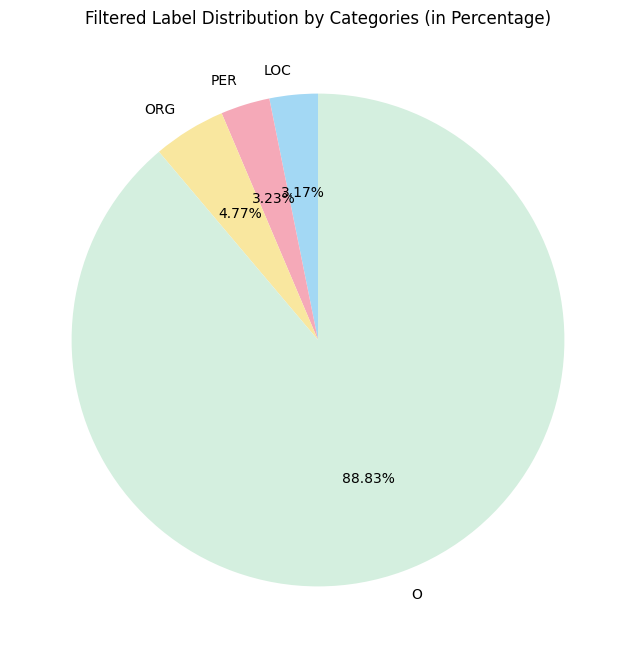

In [23]:
merged_counts = {
    'LOC': label_counts.get('B-LOC', 0) + label_counts.get('I-LOC', 0),
    'PER': label_counts.get('B-PER', 0) + label_counts.get('I-PER', 0),
    'ORG': label_counts.get('B-ORG', 0) + label_counts.get('I-ORG', 0),
    'O': label_counts.get('O', 0)
}

total = sum(merged_counts.values())
percentages_filtered = {k: (v / total) * 100 for k, v in merged_counts.items()}

soft_colors = ['#A3D8F4', '#F5A9B8', '#F9E79F', '#D4EFDF']
plt.figure(figsize=(8, 8))
plt.pie(percentages_filtered.values(), labels=percentages_filtered.keys(), autopct='%1.2f%%', startangle=90, colors=soft_colors)
plt.title('Filtered Label Distribution by Categories (in Percentage)')
plt.show()

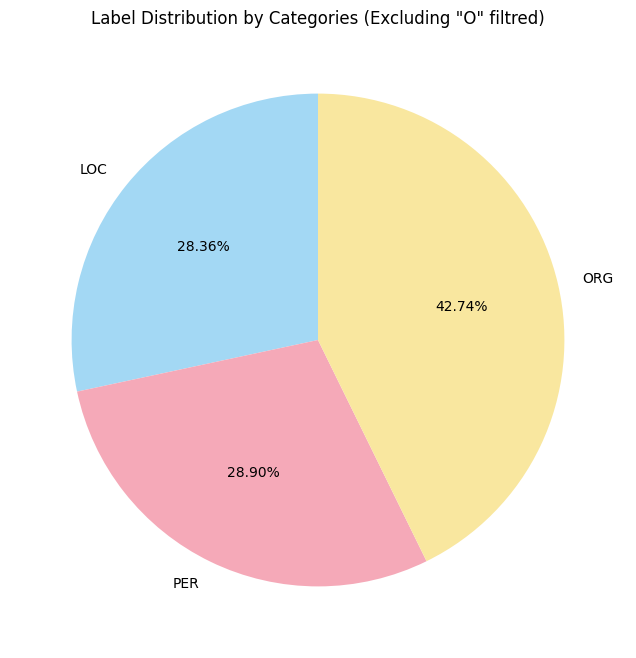

(65781, 2)


In [24]:
entities_count_without_O_flt = {key: value for key, value in merged_counts.items() if key != 'O'}

total_without_O = sum(entities_count_without_O_flt.values())
percentages_without_O = {key: (value / total_without_O) * 100 for key, value in entities_count_without_O_flt.items()}
soft_colors_without_O = ['#A3D8F4', '#F5A9B8', '#F9E79F']
plt.figure(figsize=(8, 8))
plt.pie(percentages_without_O.values(), labels=percentages_without_O.keys(), autopct='%1.2f%%', startangle=90, colors=soft_colors_without_O)

plt.title('Label Distribution by Categories (Excluding "O" filtred)')

plt.show()
print(df_full.shape)

In [25]:
label_to_number = {
    'O': 0,
    'B-PER': 1,
    'I-PER': 2,
    'B-ORG': 3,
    'I-ORG': 4,
    'B-LOC': 5,
    'I-LOC': 6,
}
def convert_labels_to_numbers(labels):
    return [label_to_number[label] for label in labels]

df_full['numeric_labels'] = df_full['flattened_filtered_text_word_labels'].apply(convert_labels_to_numbers)

df_full[['flattened_filtered_text_word_labels', 'numeric_labels']].head()


,flattened_filtered_text_word_labels,numeric_labels
0,"[O, O, O, O, B-LOC, O, O, O, O, O, O, O, O, B-...","[0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, ..."
1,"[B-LOC, O, B-LOC, O, O, O, O, O, O, O, O, O, O...","[5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, ..."
2,"[O, O, B-ORG, B-PER, I-PER, O, B-PER, I-PER, O...","[0, 0, 3, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[O, B-ORG, I-ORG, O, O, O, O, O, O, O, O, O, O...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [26]:
all_rows = 65781
train_data_size = round(all_rows * 0.7, 0)
valid_data_size = round(all_rows * 0.15, 0)
test_data_size = all_rows - train_data_size - valid_data_size

In [27]:
def create_splits(df, train_size, val_size, test_size):
    def count_labels(tags):
        b_per = tags.count(1) 
        i_per = tags.count(2)
        b_org = tags.count(3)
        i_org = tags.count(4)
        b_loc = tags.count(5) 
        i_loc = tags.count(6)
        return {"per": b_per + i_per, "org": b_org + i_org, "loc": b_loc + i_loc}

    df["label_counts"] = df['numeric_labels'].apply(count_labels)
    df["per_count"] = df["label_counts"].apply(lambda x: x["per"])
    df["org_count"] = df["label_counts"].apply(lambda x: x["org"])
    df["loc_count"] = df["label_counts"].apply(lambda x: x["loc"]) 
    
    train_data = df.sample(n=train_size, random_state=21)
    remaining_data = df.drop(train_data.index)
    validation_data = remaining_data.sample(n=val_size, random_state=21)
    test_data = remaining_data.drop(validation_data.index).sample(n=test_size, random_state=21)
    
    print(f"Train size: {len(train_data)} rows")
    print(f"Validation size: {len(validation_data)} rows")
    print(f"Test size: {len(test_data)} rows")
    
    def print_distribution(name, data):
        label_sum = data[["per_count", "org_count", "loc_count"]].sum() 
        total = label_sum["per_count"] + label_sum["org_count"] + label_sum["loc_count"]
        per_percentage = label_sum["per_count"] / total * 100 if total else 0
        org_percentage = label_sum["org_count"] / total * 100 if total else 0
        loc_percentage = label_sum["loc_count"] / total * 100 if total else 0
        print(f"\n{name} label distribution:")
        print(label_sum)
        print(f"{name} label percentages: PER: {per_percentage:.2f}%, ORG: {org_percentage:.2f}%, LOC: {loc_percentage:.2f}%")
    
    print_distribution("Train", train_data)
    print_distribution("Validation", validation_data)
    print_distribution("Test", test_data)
    
    return train_data, validation_data, test_data

train_data, validation_data, test_data = create_splits(df_full, int(train_data_size), int(valid_data_size), int(test_data_size))


Train size: 46047 rows
Validation size: 9867 rows
Test size: 9867 rows

Train label distribution:
per_count    289754
org_count    427710
loc_count    284362
dtype: int64
Train label percentages: PER: 28.92%, ORG: 42.69%, LOC: 28.38%

Validation label distribution:
per_count    59457
org_count    90133
loc_count    58676
dtype: int64
Validation label percentages: PER: 28.55%, ORG: 43.28%, LOC: 28.17%

Test label distribution:
per_count    63878
org_count    93014
loc_count    62301
dtype: int64
Test label percentages: PER: 29.14%, ORG: 42.43%, LOC: 28.42%


In [28]:
df_full.columns

Index(['flattened_filtered_text_words', 'flattened_filtered_text_word_labels',
       'numeric_labels', 'label_counts', 'per_count', 'org_count',
       'loc_count'],
      dtype='object')

In [29]:
def prepare_data(df):
    return pd.DataFrame({
        'id': df.index,
        'words': df['flattened_filtered_text_words'],
        'ner_tags': df['numeric_labels']
    })

train_dataset = Dataset.from_pandas(prepare_data(train_data))
validation_dataset = Dataset.from_pandas(prepare_data(validation_data))
test_dataset = Dataset.from_pandas(prepare_data(test_data))
dataset_dict = DatasetDict({
    'train': train_dataset,
    'validation': validation_dataset,
    'test': test_dataset
})
print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['id', 'words', 'ner_tags', '__index_level_0__'],
        num_rows: 46047
    })
    validation: Dataset({
        features: ['id', 'words', 'ner_tags', '__index_level_0__'],
        num_rows: 9867
    })
    test: Dataset({
        features: ['id', 'words', 'ner_tags', '__index_level_0__'],
        num_rows: 9867
    })
})


In [44]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [30]:
def tokenize_and_align_labels(example, tokenizer, label_all_tokens=True):
    tokenized_inputs = tokenizer(
        example["words"],
        truncation=True,             
        is_split_into_words=True,   
        padding="longest",           
        return_tensors="pt"          
    )
    labels = []
    for i, label in enumerate(example['ner_tags']):
        word_ids = tokenized_inputs.word_ids(batch_index=i)

        previous_word_idx = None
        label_ids = []

        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)

            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs


In [31]:
q = tokenize_and_align_labels(dataset_dict['train'][6:7], tokenizer) 
print(q) 

{'input_ids': tensor([[     0,   4056,   2475,  80605,   2857,   4801,   1867,  34875, 101025,
             61,  31543,    650,  16931,     84, 225897, 116649,  23197,  12523,
          69102,    260,    489,  46226,     89,     84, 162340,  28834,   2744,
           1536,  36571,  30462,   3645, 211247,   6207,  97428,   2871,      5,
         241758,     12,   5729, 137007, 145804,  56487, 144688,    197, 139566,
          56487,      4,  16279, 240904,    790,  46226,  12919,      4, 196913,
         180793,  80956,  13914,  66298,     15,    105,    780,  18122,  13345,
           8378, 165443,    194,  33280,    529,   2475,  13994,    790,      4,
          99491,    210,  45426,  13205,      4,     77, 138871,  18777,  40144,
           5934,    751, 230545,  95633,      4,   8098,   1443,   4968, 187562,
             84,  59319,    336,  62875,  43527,  22659,    244,      5,  15942,
         154756,      4,    210, 130640, 237253,   7886, 225897,  88828,     49,
          5874

In [32]:
for token, label in zip(tokenizer.convert_ids_to_tokens(q["input_ids"][0]),q["labels"][0]): 
    print(f"{token:_<40} {label}") 

<s>_____________________________________ -100
▁Со_____________________________________ 0
ці______________________________________ 0
ологи___________________________________ 0
▁Ви_____________________________________ 3
щ_______________________________________ 3
ої______________________________________ 3
▁школи__________________________________ 4
▁економіки______________________________ 4
▁за_____________________________________ 0
фік_____________________________________ 0
с_______________________________________ 0
ували___________________________________ 0
▁у______________________________________ 0
▁росіян_________________________________ 0
▁зростання______________________________ 0
▁громадян_______________________________ 0
ської___________________________________ 0
▁активност______________________________ 0
і_______________________________________ 0
▁та_____________________________________ 0
▁вір____________________________________ 0
и_______________________________________ 0
▁у______

In [33]:
from datasets import DatasetDict
tokenized_datasets = dataset_dict.map(
    lambda examples: tokenize_and_align_labels(examples, tokenizer),
    batched=True,
)
# print(tokenized_datasets)

Map:   0%|          | 0/46047 [00:00<?, ? examples/s]

Map:   0%|          | 0/9867 [00:00<?, ? examples/s]

Map:   0%|          | 0/9867 [00:00<?, ? examples/s]

In [34]:
from transformers import Trainer, TrainingArguments, DataCollatorForTokenClassification

In [44]:
from evaluate import load
metric = load("seqeval")

In [45]:
model = AutoModelForTokenClassification.from_pretrained(model_name, num_labels=7)

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [46]:
model = model.to('cuda')

In [47]:
def compute_metrics(eval_preds, label_list): 
    """
    Function to compute the evaluation metrics for Named Entity Recognition (NER) tasks.
    """
    pred_logits, labels = eval_preds 

    pred_logits = np.argmax(pred_logits, axis=2) 

    predictions = [ 
        [label_list[pred] for (pred, l) in zip(prediction, label) if l != -100] 
        for prediction, label in zip(pred_logits, labels) 
    ] 

    true_labels = [ 
        [label_list[l] for (pred, l) in zip(prediction, label) if l != -100] 
        for prediction, label in zip(pred_logits, labels) 
    ] 

    results = metric.compute(predictions=predictions, references=true_labels) 

    return { 
        "precision": results["overall_precision"], 
        "recall": results["overall_recall"], 
        "f1": results["overall_f1"], 
        "accuracy": results["overall_accuracy"], 
    }

In [48]:
label_list = ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']

In [49]:
def compute_metrics_with_labels(eval_preds):
    return compute_metrics(eval_preds, label_list)

In [50]:
data_collator = DataCollatorForTokenClassification(tokenizer)

In [51]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps", 
    eval_steps=1000,
    save_strategy="steps",
    save_steps=1000,
    save_total_limit=4,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    logging_dir="./logs",
    logging_steps=100,
    learning_rate=2e-5,
    lr_scheduler_type="cosine",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    report_to="tensorboard",
    warmup_ratio=0.05,
    fp16=True,
    max_grad_norm=1.0,
    gradient_accumulation_steps=2,
    label_smoothing_factor=0.05
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [52]:
from collections import Counter
number_to_label = {v: k for k, v in label_to_number.items()}

all_tags = [tag for tags in df_full["numeric_labels"] for tag in tags]
tag_counts = Counter(all_tags)

total_tags = sum(tag_counts.values())

percentages = {tag: count / total_tags * 100 for tag, count in tag_counts.items()}

for tag_id in sorted(percentages):
    tag_name = number_to_label[tag_id]
    percentage = percentages[tag_id]
    print(f"Tag {tag_id} ({tag_name}): {percentage:.2f}%")

Tag 0 (O): 88.83%
Tag 1 (B-PER): 2.08%
Tag 2 (I-PER): 1.14%
Tag 3 (B-ORG): 2.84%
Tag 4 (I-ORG): 1.94%
Tag 5 (B-LOC): 2.76%
Tag 6 (I-LOC): 0.40%


In [53]:
from transformers import Trainer, EarlyStoppingCallback
import torch
import torch.nn as nn

o_ratio   = percentages.get(0, 0) / 100
per_ratio = (percentages.get(1, 0) + percentages.get(2, 0)) / 100
org_ratio = (percentages.get(3, 0) + percentages.get(4, 0)) / 100
loc_ratio = (percentages.get(5, 0) + percentages.get(6, 0)) / 100

def safe_inv(x): return 1.0 / x if x > 0 else 1.0

entity_weight = safe_inv(per_ratio + org_ratio + loc_ratio)
class_weights = torch.tensor([
    safe_inv(o_ratio), 
    entity_weight,
    entity_weight,
    entity_weight,
    entity_weight,
    entity_weight,
    entity_weight
], dtype=torch.float)


class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits


        logits = nn.functional.dropout(logits, p=0.3, training=self.model.training)


        loss_fct = nn.CrossEntropyLoss(
            weight=class_weights.to(logits.device),
            ignore_index=-100,
            label_smoothing=0.05
        )
        loss = loss_fct(logits.view(-1, logits.shape[-1]), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics_with_labels,
    data_collator=data_collator
)

trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=1))

trainer.train()

trainer.save_model("./best_model")
tokenizer.save_pretrained("./best_model")

<ipython-input-53-c0cb40a60e9b>:42: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1000,1.062800,0.793482,0.833866,0.938779,0.883218,0.974489
2000,1.034900,0.780966,0.861669,0.941332,0.899741,0.978500
3000,1.021700,0.775718,0.872571,0.946311,0.907946,0.980920
4000,1.016300,0.770739,0.876510,0.947917,0.910816,0.981423
5000,1.012200,0.772299,0.865433,0.949275,0.905417,0.979883


('./best_model/tokenizer_config.json',
 './best_model/special_tokens_map.json',
 './best_model/sentencepiece.bpe.model',
 './best_model/added_tokens.json',
 './best_model/tokenizer.json')

In [54]:
predictions, labels, metrics = trainer.predict(tokenized_datasets["test"])

print("Metrics on test dataset:", metrics)

Metrics on test dataset: {'test_loss': 0.7626747488975525, 'test_precision': 0.8792449818428508, 'test_recall': 0.9476830876871022, 'test_f1': 0.9121821631878558, 'test_accuracy': 0.9810029398986184, 'test_runtime': 199.1852, 'test_samples_per_second': 49.537, 'test_steps_per_second': 1.551}


In [55]:
df_metrics = pd.DataFrame(trainer.state.log_history)

In [56]:
df_train = df_metrics.dropna(subset=["loss"])
df_eval = df_metrics.dropna(subset=["eval_loss"])
df_train

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,loss,grad_norm,learning_rate,epoch,step,eval_loss,eval_precision,eval_recall,eval_f1,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,2.0611,4.354756,0.000005,0.069493,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.2655,3.838593,0.000011,0.138985,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.1311,4.740081,0.000017,0.208478,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.1081,2.516759,0.000020,0.277971,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0847,4.305667,0.000020,0.347464,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0798,4.309011,0.000020,0.416956,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0767,2.026892,0.000020,0.486449,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0729,3.128978,0.000020,0.555942,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0653,4.295574,0.000020,0.625434,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0628,2.846994,0.000020,0.694927,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_eval

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,loss,grad_norm,learning_rate,epoch,step,eval_loss,eval_precision,eval_recall,eval_f1,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
10,NaN,NaN,NaN,0.694927,1000,0.793482,0.833866,0.938779,0.883218,0.974489,198.6760,49.664,1.555,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,1.389854,2000,0.780966,0.861669,0.941332,0.899741,0.978500,198.4557,49.719,1.557,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,2.084781,3000,0.775718,0.872571,0.946311,0.907946,0.980920,198.0618,49.818,1.560,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,2.779708,4000,0.770739,0.876510,0.947917,0.910816,0.981423,198.1354,49.799,1.560,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,3.474635,5000,0.772299,0.865433,0.949275,0.905417,0.979883,198.1745,49.789,1.559,NaN,NaN,NaN,NaN,NaN


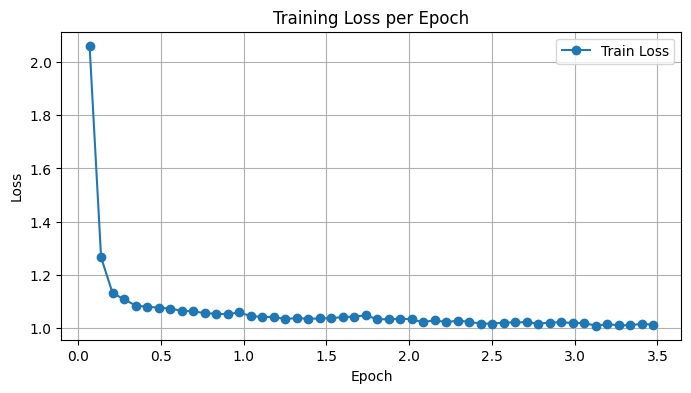

In [58]:
plt.figure(figsize=(8, 4))
plt.plot(df_train["epoch"], df_train["loss"], marker='o', linestyle='-', label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()
plt.grid()
plt.show()

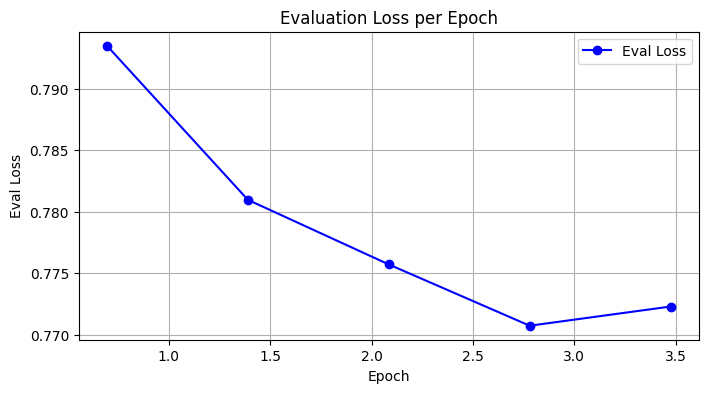

In [59]:
df_eval = df_metrics.dropna(subset=["eval_loss"])

plt.figure(figsize=(8, 4))
plt.plot(df_eval["epoch"], df_eval["eval_loss"], marker='o', linestyle='-', color="blue", label="Eval Loss")
plt.xlabel("Epoch")
plt.ylabel("Eval Loss")
plt.title("Evaluation Loss per Epoch")
plt.legend()
plt.grid()
plt.show()

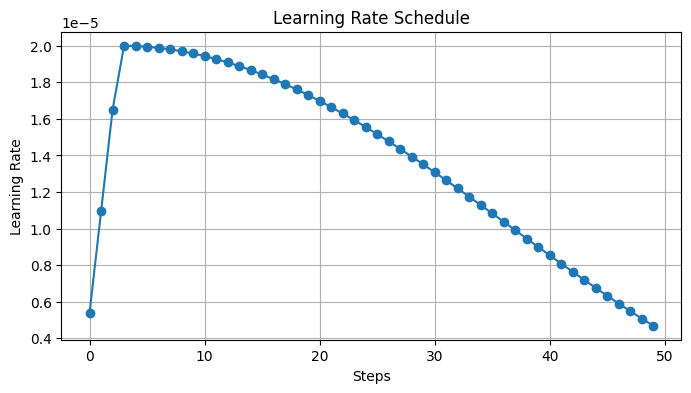

In [60]:
def plot_learning_rate(trainer):
    lr_logs = [log["learning_rate"] for log in trainer.state.log_history if "learning_rate" in log]
    steps = list(range(len(lr_logs)))

    plt.figure(figsize=(8, 4))
    plt.plot(steps, lr_logs, marker='o', linestyle='-')
    plt.xlabel("Steps")
    plt.ylabel("Learning Rate")
    plt.title("Learning Rate Schedule")
    plt.grid()
    plt.show()
plot_learning_rate(trainer)

NameError: name 'trainer' is not defined

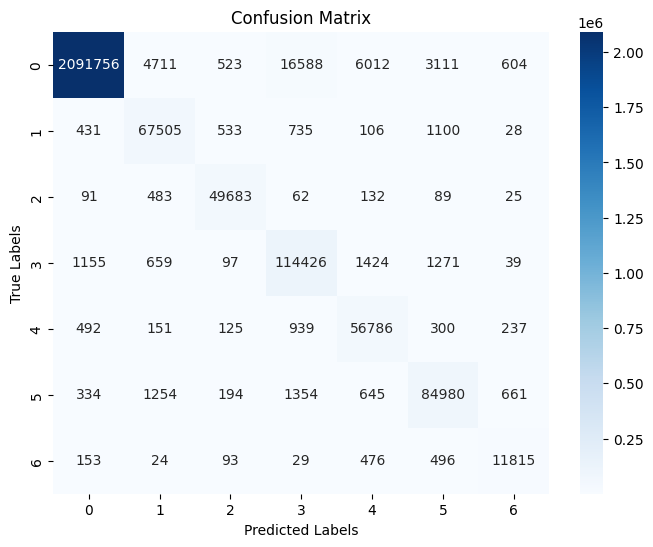

In [1]:
from sklearn.metrics import confusion_matrix

predictions, labels, metrics = trainer.predict(tokenized_datasets["test"])

preds = np.argmax(predictions, axis=-1)
valid_idx = labels != -100
labels = labels[valid_idx]
preds = preds[valid_idx]

cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [62]:
from transformers import pipeline
ner_pipeline = pipeline(
    "ner",
    model=model,
    tokenizer=tokenizer,
    aggregation_strategy="simple"
)

def perform_inference(text: str):
    results = ner_pipeline(text)
    return results

texts = [
    "Президент України Володимир Зеленський відвідав штаб-квартиру ПриватБанк.",
    "Компанія SoftServe є лідером у галузі IT-інновацій, постійно впроваджуючи новітні технології.",
    "Відомий науковець Марія Коваленко отримала престижну нагороду за свої дослідження.",
    "Керівник відділу маркетингу компанії 'Розумні Технології' Олександр Іваненко презентував нову стратегію."
]

for text in texts:
    print("Text:", text)
    results = perform_inference(text)
    print("NER Results:")
    for entity in results:
        print(entity)
    print("=" * 50)

Device set to use cuda:0


Text: Президент України Володимир Зеленський відвідав штаб-квартиру ПриватБанк.
NER Results:
{'entity_group': 'LABEL_0', 'score': 0.5990856, 'word': 'Президент України', 'start': 0, 'end': 17}
{'entity_group': 'LABEL_1', 'score': 0.96691084, 'word': 'Володимир', 'start': 18, 'end': 27}
{'entity_group': 'LABEL_2', 'score': 0.97059053, 'word': 'Зеленський', 'start': 28, 'end': 38}
{'entity_group': 'LABEL_0', 'score': 0.6311143, 'word': 'відвідав штаб-квартиру', 'start': 39, 'end': 61}
{'entity_group': 'LABEL_3', 'score': 0.96622545, 'word': 'ПриватБанк.', 'start': 62, 'end': 73}
Text: Компанія SoftServe є лідером у галузі IT-інновацій, постійно впроваджуючи новітні технології.
NER Results:
{'entity_group': 'LABEL_0', 'score': 0.6505145, 'word': 'Компанія', 'start': 0, 'end': 8}
{'entity_group': 'LABEL_3', 'score': 0.9696961, 'word': 'SoftServe', 'start': 9, 'end': 18}
{'entity_group': 'LABEL_0', 'score': 0.64129, 'word': 'є лідером у галузі IT-інновацій, постійно впроваджуючи новітні тех

In [2]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

model_name = "savkivyaryna21/ukr_ner_mlproject"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

In [3]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    per_device_eval_batch_size=32,
    report_to="none"
)

trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args
)

<ipython-input-3-0570e5ccdc4d>:9: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
id2label = {
    0: "O",
    1: "B-PER",
    2: "I-PER",
    3: "B-ORG",
    4: "I-ORG",
    5: "B-LOC",
    6: "I-LOC"
}
predictions, labels, metrics = trainer.predict(tokenized_datasets["test"])

In [36]:
predictions

array([[[ 0.92464113, -0.6316073 , -0.55421925, ..., -0.3780647 ,
         -0.7660603 , -0.851074  ],
        [ 1.5341628 , -0.82792425, -0.8641514 , ..., -0.88232094,
         -0.84160775, -0.8155029 ],
        [ 1.5381019 , -0.8278787 , -0.85588104, ..., -0.86498463,
         -0.8444912 , -0.8120638 ],
        ...,
        [ 0.93530446, -0.63900125, -0.56001574, ..., -0.38093182,
         -0.7682497 , -0.85857576],
        [ 0.93530446, -0.63900125, -0.56001574, ..., -0.38093182,
         -0.7682497 , -0.85857576],
        [ 0.93530446, -0.63900125, -0.56001574, ..., -0.38093182,
         -0.7682497 , -0.85857576]],

       [[ 1.0273817 , -0.6232201 , -0.55219716, ..., -0.43270695,
         -0.75823706, -0.85006034],
        [ 1.5517843 , -0.8504715 , -0.87763673, ..., -0.86909956,
         -0.8466585 , -0.82989216],
        [ 1.5550864 , -0.85603803, -0.8738224 , ..., -0.8667388 ,
         -0.84585565, -0.8305396 ],
        ...,
        [ 1.5483189 , -0.8441954 , -0.86063224, ..., -

In [37]:
preds = np.argmax(predictions, axis=-1)

In [38]:
valid_idx = labels != -100
labels = labels[valid_idx]
preds = preds[valid_idx]

In [41]:
label_to_number = {
    'O': 0,
    'B-PER': 1,
    'I-PER': 2,
    'B-ORG': 3,
    'I-ORG': 4,
    'B-LOC': 5,
    'I-LOC': 6,
}

number_to_label = {v: k for k, v in label_to_number.items()}

ordered_labels = list(label_to_number.values())
ordered_names = [number_to_label[i] for i in ordered_labels]

In [42]:
from sklearn.metrics import classification_report

pred_tags = [id2label[i] for i in preds]
true_tags = [id2label[i] for i in labels]

print("\n📋 Classification Report:\n")
print(classification_report(
    true_tags,
    pred_tags,
    labels=ordered_names,
    digits=4,
    zero_division=0
))


📋 Classification Report:

              precision    recall  f1-score   support

           O     0.9987    0.9851    0.9919   2123305
       B-PER     0.9027    0.9584    0.9297     70438
       I-PER     0.9695    0.9826    0.9760     50565
       B-ORG     0.8531    0.9610    0.9038    119071
       I-ORG     0.8659    0.9619    0.9114     59030
       B-LOC     0.9303    0.9503    0.9402     89422
       I-LOC     0.8811    0.9029    0.8919     13086

    accuracy                         0.9810   2524917
   macro avg     0.9145    0.9575    0.9350   2524917
weighted avg     0.9825    0.9810    0.9815   2524917



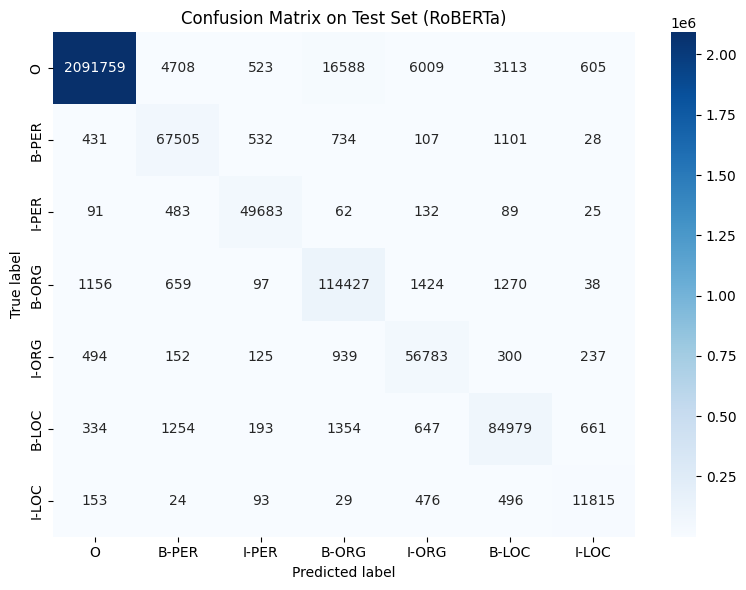

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

label_to_number = {
    'O': 0,
    'B-PER': 1,
    'I-PER': 2,
    'B-ORG': 3,
    'I-ORG': 4,
    'B-LOC': 5,
    'I-LOC': 6,
}

number_to_label = {v: k for k, v in label_to_number.items()}

ordered_labels = list(label_to_number.values())
ordered_names = [number_to_label[i] for i in ordered_labels]

cm = confusion_matrix(labels, preds, labels=ordered_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=ordered_names,
    yticklabels=ordered_names
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix on Test Set (RoBERTa)")
plt.tight_layout()
plt.show()